# 1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO

en resumen : aremos una segmentacion para que a cada cliente se le ofrezca el anuncio adecuado 
## marketing 
- Es importante para el crecimiento y sostenibilidad de cualquier negocio
- los especialistas en marketing pueden ayudar a desarrollar la marca de las empresas, atraer mas clientes.
![alt text](https://drive.google.com/uc?id=1iBuWfpl1xoGUya8xc2Ucxb4hSWpo-oNR)

- Uno de los puntos críticos para los especialistas en marketing es conocer a sus clientes e identificar sus necesidades.
- Al comprender al cliente, los especialistas en marketing pueden lanzar una campaña de marketing dirigida que se adapte a necesidades específicas.
- Si los datos sobre los clientes están disponibles, la ciencia de datos se puede aplicar para realizar la segmentación del mercado.
- En este caso práctico, nos han contratado como expertos en data
science para una empresa de minorista de análisis de Seattle, U.S.
- La empresa tiene muchos datos de sus clientes de los últimos 2 años y medio.
- Se nos encomienda la tarea de crear campañas de marketing enfocadas a los clientes, dividiéndolos para ello en por lo menos 3 segmentos diferentes
  - ORDERNUMER: Identificador del pedido
  - QUANTITYORDERED: Número de ítems comprados
  - PRICEEACH: Precio de cada ítem
  - SALES: Total de ventas efectuads
  - ORDERDATE: Fecha del pedido realizado
  - STATUS: Estado del pedido
  - QTR_ID: Trimestre en el que se hace el pedido
  - MONTH_ID: Mes en el que se hace el pedido 
  - YEAR_ID: Año en el que se hace el pedido
  - PRODUCTLINE: Categoría del Producto
  - CUSTOMERNAME: Nombre del cliente
  - PHONE: Número de teléfono
  - ADDRESSLINE1: Dirección de envío . #ADDRESSLINE2: Dirección de envío
  - CITY: Ciudad en la que reside el cliente
  - STATE: Estado en el que reside el cliente
  - POSTALCODE: Código postal del cliente
  - COUNTRY: País en el que reside el cliente
  - TERRITORY: Territorio en el que reside el cliente . # DEALSIZE: Tamaño del pedido
  - CONTACTFIRST NAME: Nombre del contacto
  - CONTACTLAST NAME: Apellido del contacto
  - MSRP es el precio minorista sugerido por el fabricante (MSRP) o el precio de etiqueta representa el precio minorista sugerido de los productos. Se utiliza para estandarizar el precio de los productos en varias ubicaciones de tiendas de la empresa.

ten en consideracion que algunas de las caracteristicas no seran utiles y las descharemos.
Fuente de Datos : https://www.kaggle.com/kyanyoga/sample-sales-data

https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P96-Section-5-Finance-AI.zip

#2: IMPORTAR LIBRERÍAS Y DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import sklearn as sk

import plotly.express as px
import plotly.graph_objects as go

from google.colab import files #Librería para cargar ficheros directamente en Colab
%matplotlib inline

In [2]:
# descargamos el dataset de la pagina del curso: https://frogames.es/masterclass-en-ia-moderna-crea-6-proyectos/
!wget --no-check-certificate \
   https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P96-Section-4-Marketing-AI.zip \
    -O /tmp/Healthcare-ai.zip

--2022-03-28 17:47:41--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P96-Section-4-Marketing-AI.zip
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.104.208
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.104.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9523902 (9.1M) [application/zip]
Saving to: ‘/tmp/Healthcare-ai.zip’

/tmp/Healthcare-ai. 100%[===================>]   9.08M  5.53MB/s    in 1.6s    

2022-03-28 17:47:44 (5.53 MB/s) - ‘/tmp/Healthcare-ai.zip’ saved [9523902/9523902]



In [3]:
# reutilizaremos codigo del caso anterior 
print("files of dataset directory: ")
%cd /tmp
print("-"*50)
print("Extracting files the dataset: ")
!unzip -u /tmp/Healthcare-ai.zip
!unzip -u /tmp/AI+in+Marketing+Dataset.zip
print("-"*50)
print("\n unpackaged dataset: ")
!ls "/tmp/AI in Marketing Dataset"

files of dataset directory: 
/tmp
--------------------------------------------------
Extracting files the dataset: 
Archive:  /tmp/Healthcare-ai.zip
  inflating: AI+in+Marketing+Slides.pdf  
  inflating: AI+in+Marketing+Dataset.zip  
Archive:  /tmp/AI+in+Marketing+Dataset.zip
   creating: AI in Marketing Dataset/
  inflating: AI in Marketing Dataset/autoencoder.h5  
  inflating: AI in Marketing Dataset/sales_data_sample.csv  
--------------------------------------------------

 unpackaged dataset: 
autoencoder.h5	sales_data_sample.csv


In [4]:
sales_df = pd.read_csv("/tmp/AI in Marketing Dataset/sales_data_sample.csv", encoding="unicode_escape")

In [5]:
sales_df.head().T

,0,1,2,3,4
ORDERNUMBER,10107,10121,10134,10145,10159
QUANTITYORDERED,30,34,41,45,49
PRICEEACH,95.7,81.35,94.74,83.26,100.0
ORDERLINENUMBER,2,5,2,6,14
SALES,2871.0,2765.9,3884.34,3746.7,5205.27
ORDERDATE,2/24/2003 0:00,5/7/2003 0:00,7/1/2003 0:00,8/25/2003 0:00,10/10/2003 0:00
STATUS,Shipped,Shipped,Shipped,Shipped,Shipped
QTR_ID,1,2,3,3,4
MONTH_ID,2,5,7,8,10
YEAR_ID,2003,2003,2003,2003,2003


## escalado de datos 
cuando trabajamos con caracteristicas que varian el orden de magnitud es importante homogenizar esa escala, para que de este modo el modelo no de mas puntuacion a las caracteristicas con una escala muy grande.
por ejemplo la variable precio puede llegar a tener valores altos mientras la variable cantidad bajos, y puede que la coantidad sea mas importante que el precio.  


## EDA 
vemos que la mayoria de variables son categoricas. 

In [6]:
sales_df["ORDERDATE"] = pd.to_datetime(sales_df["ORDERDATE"])

In [7]:
sales_df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

In [8]:
print(sales_df.isnull().sum())

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


## eliminacion de variables inutiles 
en este punto nos damos cuenta que hay variables con muchos datos nulos, pero que ademas, inferiendo de forma logica no es muy importante. 
hay otras variables que no tiene mucha relevancia como el numero de orden que no tiene sentido conservar asi que las quitamos. vemos que tenemos muchas varabñles de referencia geografica, asi que nos quedamos solo con una el pais


In [9]:
drop_list = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 
             'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
sales_df = sales_df.drop(drop_list, axis= 1) # axis=1 indica que se eliminen las columnas, axis=0 elimina la muestra 
print(sales_df.isnull().sum())

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64


In [10]:
print(sales_df.nunique())
print("-"*50)
print(sales_df["COUNTRY"].value_counts())


QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
PRODUCTCODE         109
COUNTRY              19
DEALSIZE              3
dtype: int64
--------------------------------------------------
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: COUNTRY, dtype: int64


 # 3: ANALISIS EXPLORATORIO DE LOS DATOS Y LIMPIEZA - PARTE 1

# ANALISIS de variables categoricas

## graficacion express interactiva con plotly.express

crearemos una función para visualizar el recuento de elementos en una columna determinada.

Ten en cuenta que Plotly es una librería de gráficos de Python que crea gráficos interactivos con calidad de publicación.
Compruébalo en: https://plotly.com/python/

Nota: px (plotly_express) es un wrapper de alto nivel entorno a plotly para una rápida exploración de datos y generación de figuras
 Compruébalo en: https://plotly.github.io/plotly_express


In [11]:
def barplot_express(x):
  fig = plt.Figure(figsize=(12,6))
  fig = px.bar(x=sales_df[x].value_counts().index, # damos las etiquetas del eje de X
               y= sales_df[x].value_counts(), # damos los numeros del eje de la Y
               color=sales_df[x].value_counts().index, # vamos a dar un color por cada pais
               height= 300) # la altrua del grafico 
  fig.show()

In [12]:
barplot_express("COUNTRY")

## que hacer con variable desbalanceada 
en general siempre que tenemos una variable categorica, es recomendado hacer un anlisis de dispersion, lo mas sncillo es crear un grafico de barras, de esta forma podremos evaluar rapidamente si la variable esta desbalanceada o no. 
en el caso de la variable "ESTATUS" vemos que esta exageradamente desbalanceado, por lo cual la variable no sirve para nada, ya que casi todas las muestras entran en shipped. hay varias opciones:
- quitar la variables (columna). cuando esta muy desvalanceado
- pedir al recolector de datos que de mas muestras de las categoriasajas, y asi poder utilizar la variable estatus 

In [13]:
barplot_express("STATUS")

In [14]:
sales_df.drop(columns=["STATUS"], inplace=True) # inplace nos ahorra poner df = df.drop() como se uso atras 
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [15]:
barplot_express("PRODUCTLINE")

In [16]:
barplot_express("DEALSIZE")

## que se hace con las variables categoricas
las categorias en ML y python se tratan como variables dummies (ficticias). en resumen las categorias de una variable pasan a ser columnas con un formato one hot encoding. recordemos que un modelo no trabaja con str tenemos que transformar todo dato a numeros. 

In [17]:
# creamos una funcion para transformar variables categoricas a dummies
def dummies_c(x):
  dum = pd.get_dummies(sales_df[x]) # creamos las columnas dummies
  sales_df.drop(columns=[x], inplace=True) # borramos la columna original
  return pd.concat([sales_df, dum], axis= 1) # axadimos dummies, axis=1 = columnas 

In [18]:
sales_df = dummies_c("COUNTRY") # convertimos country
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,...,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,0
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,1
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,1


In [19]:
# convertimos las categorias faltantes 
sales_df = dummies_c("DEALSIZE")
sales_df = dummies_c("PRODUCTLINE")

## arreglar una variables categorica con muchas categorias
si revisemos cuantas categorias (usando sales_df.unique()) tiene la variable PRODCUTCODE vemos que tiene 109 categorias por lo cual seria insostenible tener un dataset con 140 columnas, por lo cual **cuando tenemos muchas categorias no convertimos a variables dummies si no a categoricas**.
en lugar de ser un formato onehotencoding a cada categoria se le asigna un indice numerico.


In [20]:
def categorical_c(x):
  indx = pd.Categorical(sales_df[x]).codes # creamos una columna con los indices de cada categoria 
  sales_df[x] = indx
  return sales_df

sales_df = categorical_c("PRODUCTCODE")

#4: ANALISIS EXPLORATORIO DE LOS DATOS Y LIMPIEZA - PARTE 2



In [21]:
# creamos un nuevo dataframe para agrupar los datos pendiendo la fecha 
sales_df_g = sales_df.groupby("ORDERDATE").sum()

## aprovechando el tipo dato dateframe 
MINI RETO 6: 
- Según los datos, ¿cuándo alcanzan su punto máximo las ventas (en qué mes)?
- Apoya tu respuesta con visualizaciones / gráficos
### graficar n_ventas a lo largo del año usando groupby 
los dataframe nos serviran para visualizar la evolucion de las variables en el tiempo. por ejemplo podemos graficar en que temporada del año hay mas ventas. 
ten en consideracion que despues de hacer estas visulizaciones tenemos que eliminar es columna para que ahora si el dataset solo contenga variables numericas. 
si fueramos a hacer un estudio de series temporales seria util pero en este caso no, ya que aqui solo vamos a hacer clustering 

In [22]:
  fig = plt.Figure(figsize=(12,6))
  fig = px.line(x=sales_df_g.index, 
               y= sales_df_g["SALES"],
               height= 300) # la altrua del grafico 
  fig.show()

In [23]:
# despues de haber usado la variable dateframe lo podemos desechar 

print(sales_df.shape)
sales_df.drop(columns=["ORDERDATE"], axis=1, inplace=True)
print(sales_df.shape)

(2823, 39)
(2823, 38)


## matriz de correlaciones 
nos servira para revisar que variables a simplevista tienen relacion. Nos servira para ver si algunas variables tienen mucha relacion, y de esta forma eliminar algunas, ya que aportarian la misma informacion al modelo 
- vemos que el RSMP(precio sugerido) y el priceeach(precio unitario) tienen relacion y es obvio intuir por que.
- vemos que las variables de cuatrimestre y mes estan muy relacionadas. por lo cual dejaremos la mas exacta (mes) y la otra la borraremos. 

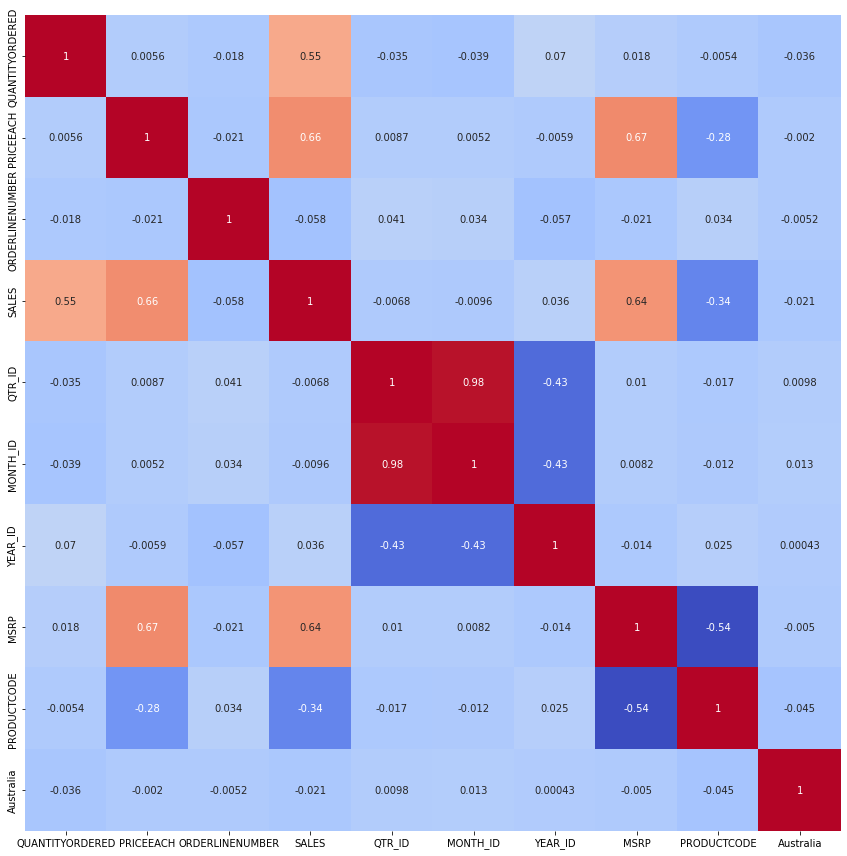

In [24]:
plt.figure(figsize=(15,15)) 
sns.heatmap(sales_df.iloc[:, :10].corr(), # solo incluiremos todas las filas de la columna 0-10 (evitando las dummies)
            annot=True, square=True, cbar=False, cmap='coolwarm')  
plt.show()

## graficamos las distribuciones usando (1) histograma, (2) kde plot y (3) rug plot.
- (1) Histograma: es una visualización gráfica de datos que usa barras con varias alturas. Cada barra agrupa los números en rangos y las barras más altas muestran que hay más datos en ese rango.
- (2) Densidad: la estimación de la función de densidad se utiliza para visualizar la densidad de probabilidad de una variable continua.
- (3) Gráfico de alfombra: gráfico de datos para una única variable cuantitativa, que se muestra como marcas a lo largo de un eje (gráfico de dispersión unidimensional).


## en este punto sales_df sera nuestro DS definitivo (no escalado)

In [25]:
# Parece que el ID del trimestre y los ID del mes están altamente correlacionados dejamos 'MONTH_ID'
sales_df.drop("QTR_ID", axis = 1, inplace = True)
sales_df.head().T

,0,1,2,3,4
QUANTITYORDERED,30.0,34.00,41.00,45.00,49.00
PRICEEACH,95.7,81.35,94.74,83.26,100.00
ORDERLINENUMBER,2.0,5.00,2.00,6.00,14.00
SALES,2871.0,2765.90,3884.34,3746.70,5205.27
MONTH_ID,2.0,5.00,7.00,8.00,10.00
YEAR_ID,2003.0,2003.00,2003.00,2003.00,2003.00
MSRP,95.0,95.00,95.00,95.00,95.00
PRODUCTCODE,0.0,0.00,0.00,0.00,0.00
Australia,0.0,0.00,0.00,0.00,0.00
Austria,0.0,0.00,0.00,0.00,0.00


In [26]:
import plotly.figure_factory as ff

fig = plt.Figure(figsize=(8,6))
for i in range(8):
  if sales_df.columns[i] != 'ORDERLINENUMBER':
    col_name = sales_df.columns[i]
    fig = ff.create_distplot([sales_df[col_name].apply(lambda x: float(x))], ["displot"],
    show_hist=True, show_curve=True, show_rug=True) # solo coloco estos parametros para saber que existen 
    fig.update_layout(title_text = col_name)
    fig.show()
# para crear histogramas los datos deben ser float 
# tenemos que agregar la label ["displot"] para que se creen los 3 grafos 

### resultados  de observar la distribucion 
- QUANTITYORDERED:  la mayoria de pedidos piden entre 20-50 items 
- PRICEEACH: la mayoria de precios ronda los 100$
- YEAR ID:  esto es una variable discreta por lo caul no tien sentido graficar
- MONTH ID: vemos que la mayoria de ventas son en diciembre 
- MRSP: El precio sugerido esta muy distribuido 


## visualizar la relacion entre variables usando parcelas
en el ejemplo practico vamos a ver como varia cada variable respecto al mes. Esto nos permitira responder:
- En diciembre se venden articulos mas baratos o caros ?
- en verano bajan las ventas, por que sube  el precio unitario ?


In [27]:
fig = plt.Figure(figsize=(15,15))
fig = px.scatter_matrix(sales_df, 
                        sales_df.columns[:8], 
                        color= "MONTH_ID")

fig.update_layout(title= "sales data", 
           width=1100,
           height= 1100,)
fig.show()

- QUANTITYORDER + MONTH_ID: nos mustra que en le mes 4 es cuando mas ordenes hay
- vemos como hay mas ventas conforme aumentan los años 
vemos como se forman figuras de embudos en MRSP-PRICEEACH, y en SALES-QUANTITYORDER-PRICEEACH-MRSP lo que nos mustra una relacion entre variables. 

# 4.5 flujo de trabajo 
1. hacer EDA para quitar variables inutiles, pasar variables categoricas a one hot encoding 
2. ya con el dataset listo estandariazmos la escala del dataset para pasarlo a K-means y PCA
3. evaluamos varios K con el modelo K-means y graficamos para detectar el optimo valor optimo de clusters por el metodo del codo 
  - 3.1 si el metodo  del codo no nos muestra un codo (# cluster) no es muy notorio, aplicamos una una red Autoencoder para hacer reduccion de dimensiones. 
4. ya con un # clusters optimo, aplicamos el modelo k-means al dataset escalado y calculamos:
  - samples_labels= m_kmeans.labels_ : las etiquetasde cluster perteniencte para cada una de las muestras 
  - cluster_values = m_kmeans.cluster_centers_: el valor de las variables para el centro de cada cluster. crearemos un dataframe con las columnas de cada variable **y sera la parte mas importante que nos servira para describir a cada grupo de clintes**. podemos apoyarnos de usar histogramas para sacara conclusiones mas facil 
5. haremos reduccion de dimensiones con PCA (reducir a 3 ) usando el dataset escalado. creamos un DF con los componentes1,2,3 + clusters_labels para  plotear los cluster de cada cliente. 

#5: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DEL CLUSTERING CON K-MEANS
INTUICIÓN DETRÁS DE K-MEANS

- K-means es un algoritmo de aprendizaje no supervisado
 (clustering).

- K-means funciona agrupando algunos puntos de datos (clustering)
 de forma no supervisada.
- El algoritmo agrupa las observaciones con valores de atributos
 similares al medir la distancia euclidiana entre puntos.



## pasos del algoritmo k-means
1. Elegir el número de clústers "K"

2. Seleccionar K puntos aleatorios que serán los centroides de cada cluster

3. Asignar cada punto del dataset al centroide más cercano, hacerlo nos permitirá crear un número "K" de clústers con dichos puntos

4. Calcular un nuevo centroide para cada cluster

5. Reasignar cada punto de datos al nuevo centroide más cercano

6. Ir al paso 4 y repetir.
lo que queremos hacer es asignar cada mustra a un centroide, y  a la vez recolocar el centroide en un punto estrategico, donde se ajuste mejor a los ejemplos.

![alt text](https://drive.google.com/uc?id=192-KIqghB5e26Q5U1Xwvnus5b-GTXIph)

## funcion de coste whithin cluster sum of squares (WCSS)
en este punto te habras dado cuenta que el parametro mas importante es el numero de clusters(K) = centroides, asi que seleccionar el numero optimo sera una tarea importante. nostros usaremos:
- whithin cluster sum of squares (WCSS): sera nuestra funcion de coste, calcula la suma de las distancias de cada punto a su cluster mas cercano y lo eleva al cuadrado, entre mas distancia haya el WCSS es mayor.
 
![alt text](https://drive.google.com/uc?id=1rEaCYYfWvDcpQaoRh8EsApMtQPUZNB2o)

## metodo del codo: 
 cada vez que añadimos un nuevo cluster el WCSS baja pero llega un punto en el que la perdida se aplana y deja de bajar ese sera considerado el codo y tomaremos en cuenta el numero k elegido.
 
 ![alt text](https://drive.google.com/uc?id=1XuVfvEFiZefGuZqOgfznU4rRHjXNh8Qk)

 # 6: ENCUENTRE EL NÚMERO ÓPTIMO DE CLUSTERS UTILIZANDO EL MÉTODO DE CODO
 - El método del codo es un método heurístico de interpretación y validación de la coherencia dentro del análisis de conglomerados diseñado para ayudar a encontrar el número apropiado de clusters en un conjunto de datos.
- Si el gráfico de líneas se parece a un brazo, entonces el "codo" en el brazo es el valor de k que es el mejor.
- Fuente:
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

## estandarizamos la escala de los datos (sk.preprocessing.StandardScaler())
si suministraramos los datos crudos como ahorita los tenemos, debido a que el modelo es ponderado sera alterado con mayor magnitud por las variables con numeros altos, y menos perjudicada por las qeu tienen valores pequeños. este problema se presenta cuando tenemos variables con magnitud de (0-10) yotras de (0-2000), para esto

In [28]:
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Large,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,30,95.70,2,2871.00,2,2003,95,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,34,81.35,5,2765.90,5,2003,95,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,41,94.74,2,3884.34,7,2003,95,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,45,83.26,6,3746.70,8,2003,95,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,49,100.00,14,5205.27,10,2003,95,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sales_df_scaled = scaler.fit_transform(sales_df)

In [30]:
# podemos ver como el dataframe ya es un array con datos estandarizados  que van de -2.9 ,13.24
print(sales_df_scaled.max())
print(sales_df_scaled.min())
print(sales_df_scaled.mean())
print(sales_df_scaled.shape)
sales_df_scaled[0:4, :] # imprimimos 4 muestras con sus 38 caracterisiticas 

13.245282178949607
-2.9870281067070685
-3.7958741089519096e-17
(2823, 37)


array([[-0.52289086,  0.5969775 , -1.05705871, -0.37082523, -1.39290889,
        -1.16517009, -0.14224584, -1.70278009, -0.26481859, -0.14096078,
        -0.10875641, -0.15945785, -0.15108305, -0.18354099, -0.3537647 ,
        -0.14985203, -0.07549858, -0.20419945, -0.13698828, -0.17619466,
        -0.09641408, -0.16967642, -0.37127839, -0.14355269, -0.10537149,
        -0.23184348,  1.34601374, -0.24267205, -0.98070333,  1.09637041,
        -0.72181225,  2.74384783, -0.34867363, -0.30063664, -0.16745383,
        -0.34547029, -0.52337077],
       [-0.11220131, -0.11445035, -0.34701507, -0.42789707, -0.57233673,
        -1.16517009, -0.14224584, -1.70278009, -0.26481859, -0.14096078,
        -0.10875641, -0.15945785, -0.15108305, -0.18354099,  2.82673767,
        -0.14985203, -0.07549858, -0.20419945, -0.13698828, -0.17619466,
        -0.09641408, -0.16967642, -0.37127839, -0.14355269, -0.10537149,
        -0.23184348, -0.74293447, -0.24267205, -0.98070333,  1.09637041,
        -0.72181

## creando modelo sklearn.cluster.KMeans
en este punto ya tenemos los datos preparados para alimentar el modelo, ahora se reliazan 3 pasos:
1. instancia el modelo
2. entrenar el modelo con los datos 
3. recolectar datos. la inercia es la suma de los cuadrados de las distancias de las observaciones al centro del cluster más cercano

- Detalles de Kmeans en Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- A partir de esto podemos observar que, el 5º grupo parece estar formando el codo de la curva.
- Tengamos en cuenta que la curva cambiará cada vez que ejecutemos la celda

nos damos cuenta que la teoria y la realidad son muy diferentes vemos como el codo es algo muy difuso, pero nos quedaremos con k=5

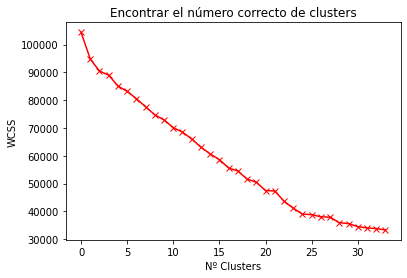

In [31]:
from sklearn.cluster import KMeans
WCSS = []
for c in range(1,35):
  m_kmeans = KMeans(n_clusters = c) # 1 cargamos el modelo especificando el n_clusters
  m_kmeans.fit(sales_df_scaled) # 2 entrenamos el modelo con la data sacalada
  WCSS.append(m_kmeans.inertia_) # 3 guardamos el valor del WCSS

plt.plot(range(len(WCSS)), WCSS, "rx-")
plt.title('Encontrar el número correcto de clusters')
plt.xlabel('Nº Clusters')
plt.ylabel('WCSS') 
plt.show()

# 7: APLICAR EL MÉTODO K-MEANS
- m_kmeans.labels_: nos regresara las etiquetas de clasificacion correspondiente a las 2823 muestras que tenemos clasificadas a el numero de categorias(5) 
- k_kmeans.cluster_centers_: nos regresara el valor de las 38 variables en el centro del cluster. dicho de otra forma son los valores medios que una muestra nueva debe tener para pertencer a un grupo.




In [32]:
# entrenamos con el mejor K

m_kmeans = KMeans(n_clusters = 5) 
m_kmeans.fit(sales_df_scaled)
samples_labels= m_kmeans.labels_
cluster_values = m_kmeans.cluster_centers_
print(samples_labels.shape)
print(cluster_values.shape)

(2823,)
(5, 37)


## obtener el valor de las variables para cada cluster 
1. creamos un dataframe con el valor de las variables para cada cluster 
2. desescalamos los valores de cada columna para interpretarlos 

In [33]:
clusters_df = pd.DataFrame(cluster_values, columns=sales_df.columns)
clusters_df.head() # ahora tendriamos el valor de las variables para cada cluster 

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Large,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,0.191867,-0.057456,-0.010199,0.033722,-0.277772,-0.945247,-0.068541,0.074165,-0.264819,-0.140961,...,-0.074847,0.096424,-0.062363,0.331795,0.472398,0.269920,-0.300637,-0.167454,-0.345470,-0.429753
1,0.293309,0.581695,-0.015345,0.457525,0.013873,-0.008210,0.369998,-0.160289,-0.007011,0.014691,...,-0.242672,1.019676,-0.912100,0.056669,-0.009349,-0.045618,-0.012744,-0.049041,0.075163,-0.052087
2,-0.032713,0.191391,0.439377,0.132130,-0.492927,0.264328,0.369955,-0.457595,-0.264819,-0.140961,...,-0.242672,0.438921,-0.328996,1.385402,-0.364452,-0.348674,-0.300637,-0.167454,-0.345470,-0.523371
3,1.248866,0.800157,-0.257501,2.576679,-0.095423,0.145203,1.430454,-0.870738,-0.083492,0.044555,...,4.120788,-0.980703,-0.912100,0.588443,0.014123,-0.183715,-0.300637,-0.128100,-0.200082,-0.148900
4,-0.470822,-0.723762,0.037639,-0.811155,0.014808,0.003801,-0.579710,0.288559,0.029770,-0.014833,...,-0.242672,-0.980703,1.096370,-0.174137,0.007461,0.074440,0.064354,0.075781,-0.039948,0.095753


In [34]:
# Para entender lo que significan estos números, realicemos una transformación inversa con el mismo objeto instanciado 
clusters_df_array = scaler.inverse_transform(clusters_df)
clusters_df = pd.DataFrame(clusters_df_array, columns=sales_df.columns)

In [35]:
clusters_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Large,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,36.961538,82.499615,6.423077,3615.989615,6.076923,2003.153846,97.961538,56.115385,1.387779e-17,-3.469447e-18,...,3.846154e-02,5.384615e-01,4.230769e-01,0.500000,2.692308e-01,1.923077e-01,-1.387779e-17,0.000000e+00,-1.387779e-17,3.846154e-02
1,37.949555,95.391736,6.401335,4396.438427,7.143175,2003.809347,115.582344,48.711424,6.379822e-02,2.151335e-02,...,7.147061e-16,1.000000e+00,-1.110223e-16,0.369436,1.142433e-01,9.421365e-02,7.937685e-02,1.928783e-02,1.298220e-01,1.936202e-01
2,34.774194,87.519032,8.322581,3797.211613,5.290323,2004.000000,115.580645,39.322581,1.387779e-17,6.938894e-18,...,2.081668e-17,7.096774e-01,2.903226e-01,1.000000,2.775558e-17,2.775558e-17,4.163336e-17,-6.938894e-18,-1.387779e-17,-2.775558e-17
3,47.256410,99.798269,5.378205,8298.944103,6.743590,2003.916667,158.192308,26.275641,4.487179e-02,2.564103e-02,...,1.000000e+00,-6.661338e-16,1.332268e-15,0.621795,1.217949e-01,5.128205e-02,-9.714451e-17,6.410256e-03,4.487179e-02,1.538462e-01
4,30.507132,69.059746,6.625198,2060.115119,7.146593,2003.817750,77.422345,62.885895,7.290016e-02,1.743265e-02,...,6.800116e-16,-1.110223e-15,1.000000e+00,0.259905,1.196513e-01,1.315372e-01,1.006339e-01,3.961965e-02,9.429477e-02,2.543582e-01


## Interpretando resultados del clustering 
ten en cuenta que el indice del cluster puede variar ya que es una tecnica heuristica(incializa(los clusters) aleatoriamente) por ejemplo el cluster 0 en nuestros resultados tiene el indice 4. 

0. Clúster 0 (más alto): este grupo representa a los clientes que compran artículos en una gran cantidad centrada en ~ 47, compran artículos en todos los rangos de precios inclinándose hacia artículos de alto precio de ~ 99. También corresponden a las ventas totales más altas alrededor de ~ 8296 y están activas durante todo el año. Son los mayores compradores de productos con un MSRP alto ~ 158.

1. Clúster 1: este grupo representa a los clientes que compran artículos en cantidades variables ~ 35, tienden a comprar artículos de alto precio ~ 96. Sus ventas son un poco mejores en promedio ~ 4435, compran productos con el segundo MSRP más alto de ~ 133.

2. Clúster 2 (más bajo): este grupo representa a los clientes que compran artículos en cantidades bajas ~ 30. Suelen comprar artículos de bajo precio ~ 68. Sus ventas ~ 2044 son más bajas que las de otros grupos y son extremadamente activos durante la temporada navideña. Compran productos con un MSRP bajo ~ 75.

3. Clúster 3: este grupo representa a los clientes que solo están activos durante las vacaciones. compran en menor cantidad ~ 35, pero tienden a comprar artículos de precio promedio alrededor de ~ 86. También corresponden a ventas totales más bajas alrededor de ~ 3673, tienden a comprar artículos con MSRP alrededor de 102.

4. Clúster 4: este grupo representa a los clientes que compran artículos en cantidad variable ~ 39, tienden a comprar artículos de precio promedio ~ 94. Sus ventas ~ 4280.


## hacemos nuevas predicciones 
para hacer nuevas predicciones basta con llamar la funcion **m_kmeans.fit_predict(samples_predict**) la cual nos devolvera la etiqueta del cluster para cada muestra. es muy parecido cuando usamos **m_kmeans.labels_**

In [36]:
predicted_clusters = m_kmeans.fit_predict(sales_df_scaled)

## creamos un histograma para cada variable y cada cluster 

In [37]:
# unimos el dataset original
sales_df_c = pd.concat([sales_df, pd.DataFrame({"CLUSTER": predicted_clusters})],axis=1)

In [38]:
# convertimos los datos a float para poder hacer el histograma 
sales_df_c["ORDERLINENUMBER"] = sales_df_c["ORDERLINENUMBER"].apply(lambda x: float(x))

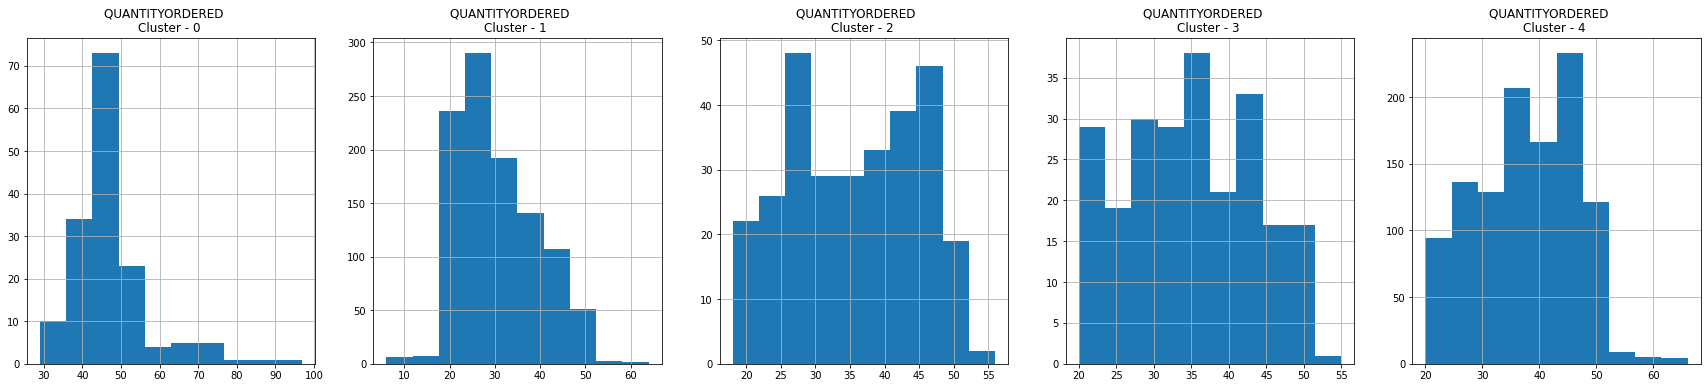

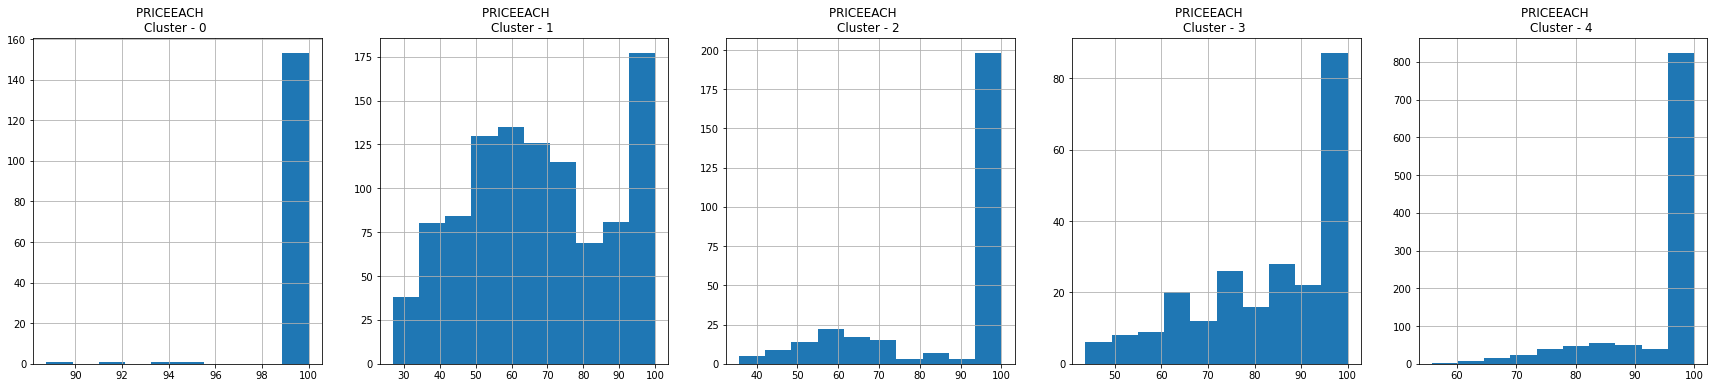

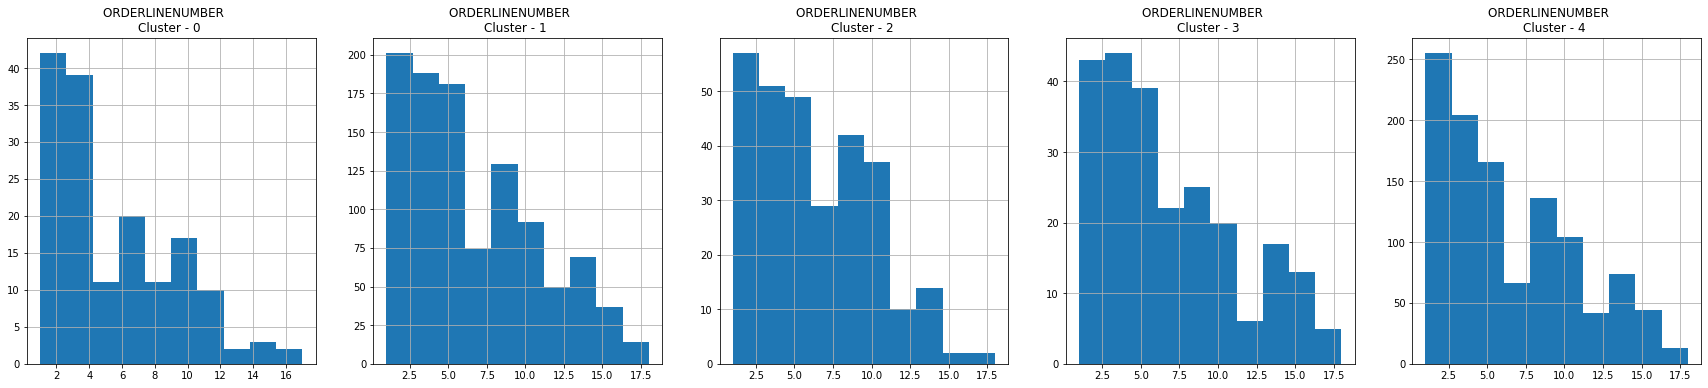

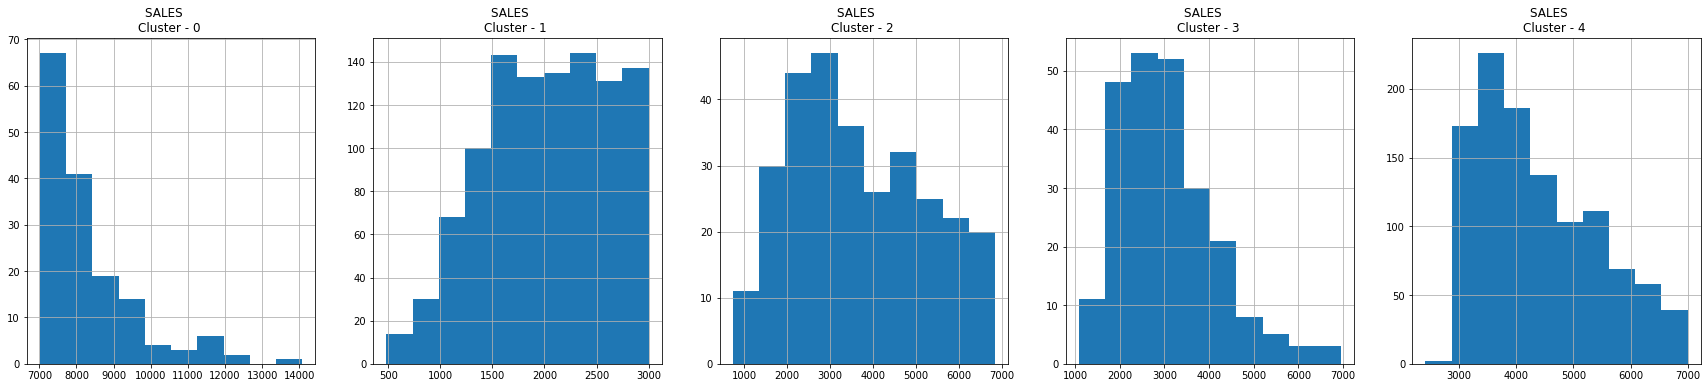

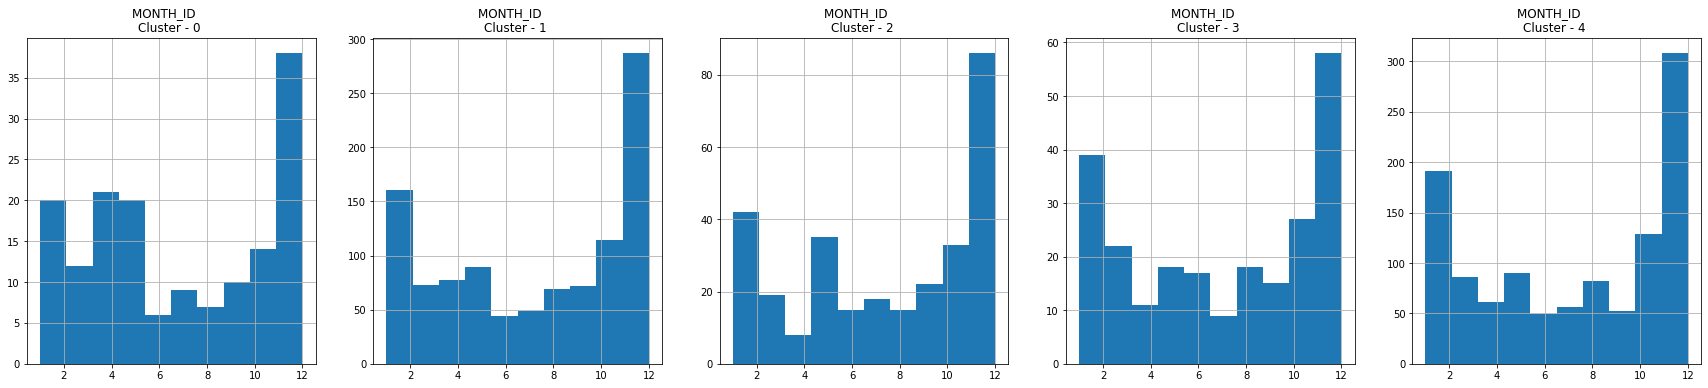

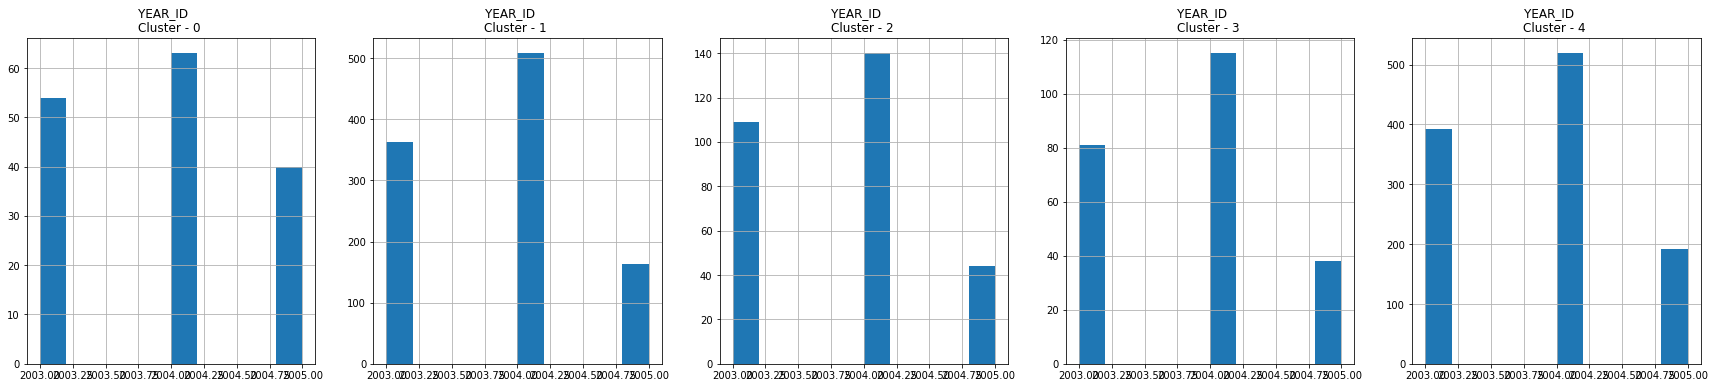

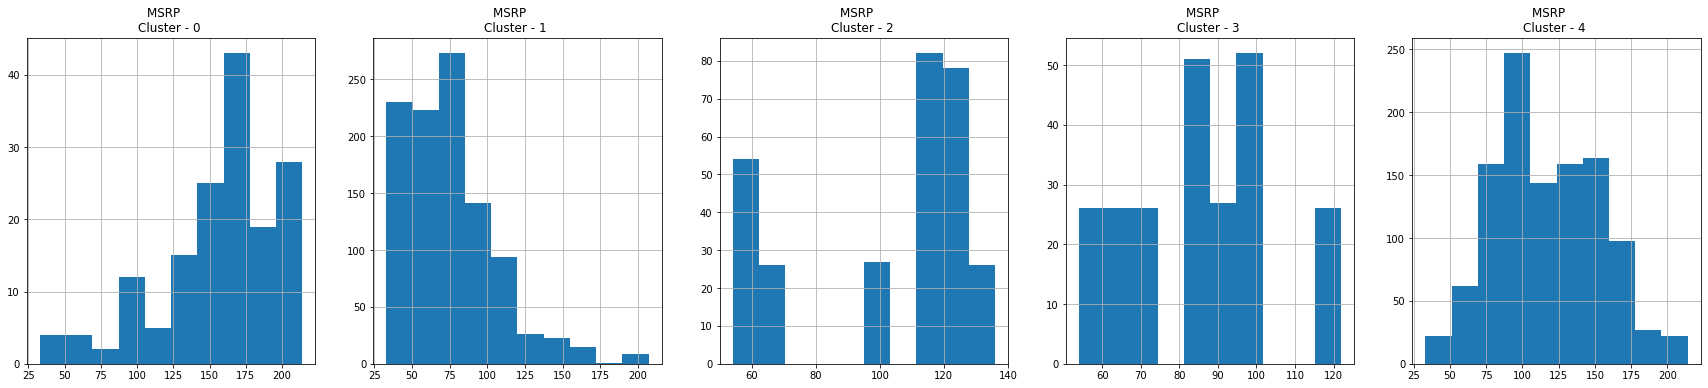

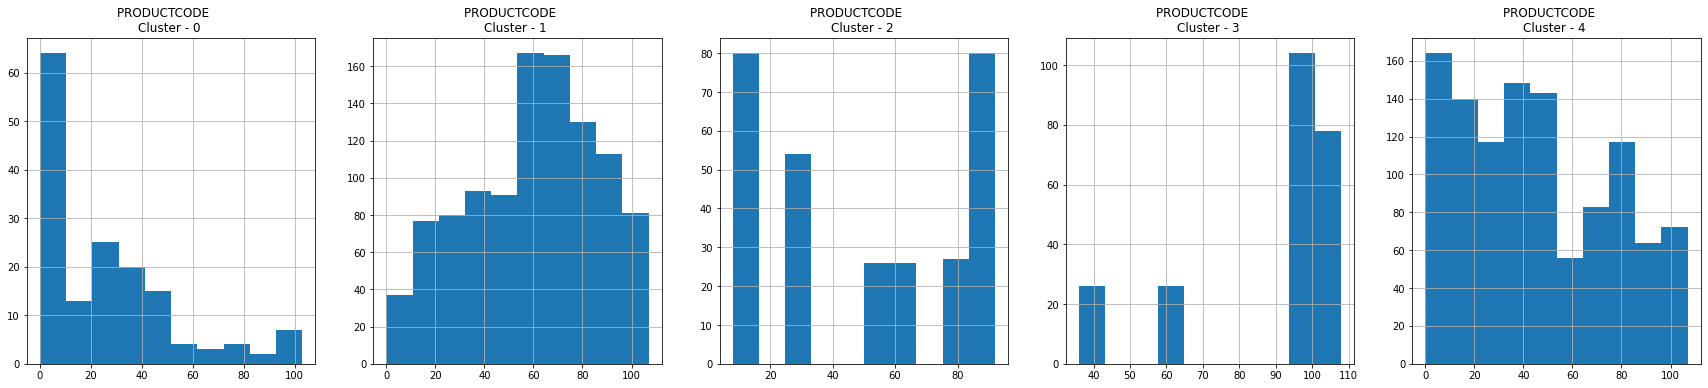

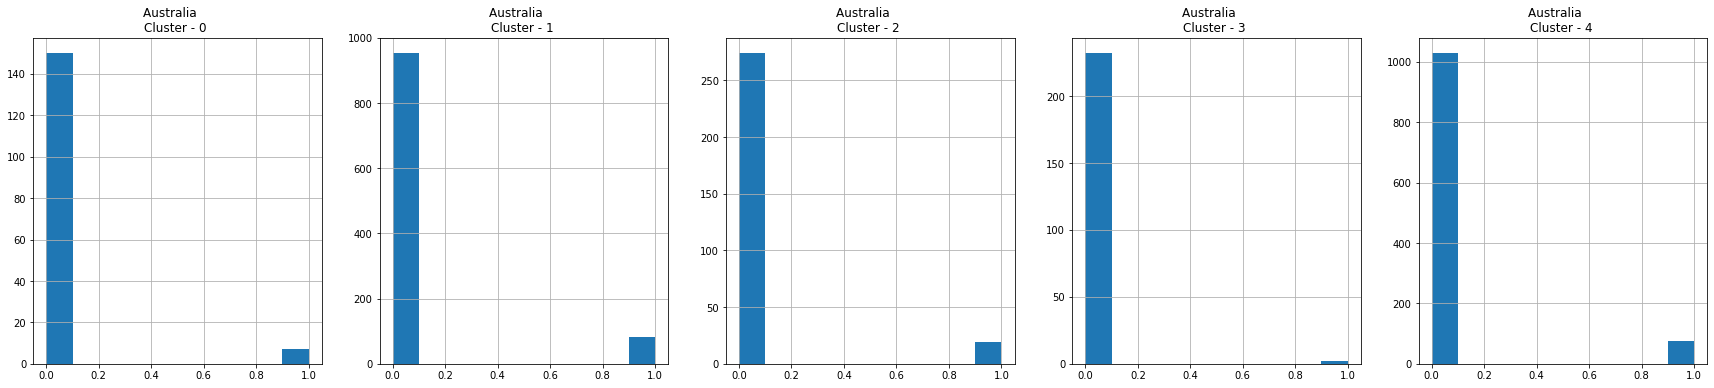

In [39]:
# Representar un histograma para cada característica según el clúster al que pertenece
sale_df_cluster= sales_df_c
for i in sales_df.columns[:9]:
  plt.figure(figsize = (30, 6))
  for j in range(5):
    plt.subplot(1, 5, j+1)
    cluster = sale_df_cluster[sale_df_cluster['CLUSTER'] == j]
    cluster[i].hist()
    plt.title('{}    \nCluster - {} '.format(i,j))
  
  plt.show()


# conclusiones de anlisis de histogramas 

Al observar los histogramas de las variables para cada grupo podemos sacar valiosas concluciones como: 
- el grupo 1 son los que mejor compran productos entorno a los 60$
- el grupo 4 tiene ventas en los primeros 6 meses del año. el resto de grupos suele comprar en epoca navideñas (dirige la campaña de marketing a esas fechas)
- el grupo 3  se enfoca en comprar productos de la categoria 0-10
- el grupo 0,1,4 presentan una distribucion casi normal en el RMSP(precio recomendado) a un precio medio, mientras 2 y 3 se enfocan a productos qeu tienen un precio recomendado y no tienen un distribucion normal en la compra de productos, al parecer son revendedores especializados en productos de alta gama.


# 8: APLICAR EL ANÁLISIS DE COMPONENTES PRINCIPALES (PCA) Y VISUALIZAR LOS RESULTADOS
El análisis de componente principales pretende transformar el conjunto de datos inicial (de variables correlacionadas) en un nuevo conjunto reducido de nuevas variables independientes (no relacionadas) llamadas componentes principales.

Las nuevas variables o componentes principales serán combinaciones lineales de las anteriores y se van construyendo según el orden de importancia en cuanto a la variabilidad total que recogen de la muestra.

![alt text](https://drive.google.com/uc?id=1mSPh65qfGhYs1ty4aMBynefOjsgofD43)

In [95]:
from sklearn.decomposition import PCA
model_PCA = PCA(n_components=3) # instanciamos el modelo 
sales_PCA = model_PCA.fit_transform(sales_df_scaled) # realizamos tranformacion con el df escalado
print(sales_PCA.shape) # obtenemos el array de resultados 

(2823, 3)


In [96]:
# convertimos los datos a dataframe 
sales_df_PCA = pd.DataFrame(data= sales_PCA, columns= ["PCA1","PCA2", "PCA3"])
sales_df_PCA.shape


(2823, 3)

In [97]:
# añadimos la columna de los clusters
sales_df_PCA = pd.concat([sales_df_PCA, sales_df_c['CLUSTER']], axis=1)
sales_df_PCA

,PCA1,PCA2,PCA3,CLUSTER
0,-0.486343,-1.169196,0.979122,1
1,-0.784726,-0.991800,1.416176,1
2,1.431408,0.169635,0.295903,4
3,1.288406,-0.194505,-0.602343,4
4,1.975985,-0.129342,-1.107585,4
...,...,...,...,...
2818,-2.450326,1.159692,-1.502545,3
2819,-0.158165,3.717161,0.668470,3
2820,0.389868,4.164699,0.006620,3
2821,-2.788893,2.403218,1.608069,3


## imprimir grafica 3D con plotly.express de PCA


In [43]:
"""from sklearn.model_selection import train_test_split
sales_df_PCA_1, sales_df_PCA_2 = train_test_split(sales_df_PCA, test_size= 0.2, shuffle=True)"""

'from sklearn.model_selection import train_test_split\nsales_df_PCA_1, sales_df_PCA_2 = train_test_split(sales_df_PCA, test_size= 0.2, shuffle=True)'

In [98]:
fig = px.scatter_3d(data_frame= sales_df_PCA,
                    x = 'PCA1', y = 'PCA2', z = 'PCA3',
                    color = 'CLUSTER', symbol = 'CLUSTER',
                    size_max = 18, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0),
                  showlegend=False) 
fig.update_traces(marker_size = 5)


MINI RETO #8:

Cambia el número de componentes a 2, modifica el código y vuelve a ejecutar el modelo
Visualiza los clústeres usando gráficos 2D

In [101]:
model_PCA = PCA(n_components=2) # instanciamos el modelo 
sales_PCA = model_PCA.fit_transform(sales_df_scaled) # realizamos tranformacion
sales_df_PCA = pd.DataFrame(data= sales_PCA, columns= ["PCA1","PCA2"])
sales_df_PCA = pd.concat([sales_df_PCA, sales_df_c['CLUSTER']], axis=1)

In [102]:
# https://plotly.com/python/line-and-scatter/
fig = px.scatter(data_frame= sales_df_PCA,
                  x = 'PCA1', y = 'PCA2', 
                 color= "CLUSTER", symbol = 'CLUSTER',
                 opacity = 0.7)

fig.update_layout(width=800,
                  height= 500,
                  showlegend=False) # https://plotly.com/python/legend/

fig.show() 
# ve como si lo perfilas en el ejede PCA1 podras ver una divicion de grupos mas visibles de acuerdo a la teoria de PCA 

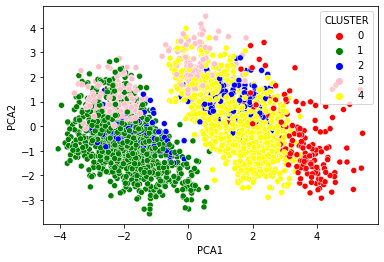

In [103]:

# USING SEABORN
ax = sns.scatterplot(x = "PCA1", y = "PCA2", hue = "CLUSTER", data = sales_df_PCA, palette = ["red", "green", "blue", "pink", "yellow"])
plt.show()

#9: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DE AUTOENCODERS
![alt text](https://drive.google.com/uc?id=1IeBNQ8sKZwAwgfh6KLJSoI_uAkCgzQhZ)

![alt text](https://drive.google.com/uc?id=1eKINXhaqUCL31cuNEuLigbKmha-IcWbz)

#10: APLICAR AUTOENCODERS (REALIZAR REDUCCIÓN DE DIMENSIONALIDAD USANDO AUTOENCODERS)
- Crearemos un Autoencoder Asimetrico: el encoder y decoder no tendran las mismas capas, para evitar  que el autoencoder haga trampa copiando los pesos de entrada y de salida. 
- usaremos un inicializdor glorto uniform para que la convergencia sea mas rapida, ya que incializa los pesos con un valor muy bajo pero no nulo
- el cuello de botella solo tendra 8 neuronas para que al final de entrenar todala arquitectura (autoencoder) solo utilizemos el encoder para reducir de 38 variables a 8, que se supone resumiran la informacion. 
- instanciaremos 2 modelos:
  - autoencoder: aruitectura global que entrenaremos para que aprende a comprimir y descomprimir
  - encoder, parte del autoenencoder que comprime la informacion, la usaremos para reducir el numero de variables. 
- usaremos el error cuadratico medio ya que tenemos valores continuos 
- podemos usar el scaled_df o el normal para entrenar a la red, no habria diferencia para el autoencoder. 

## pasos 
1. entrenar el autoencoder para que aprenda a comprimir y descomprimir la informacion de nuestro dataset
2. usaremos el encoder para reducir el n de variables en nuestro dataset 
3. usaremos la inforacion comprimida para para aplicar de nuevo el metodo del codo de kmeans y ver si el codo de la grafica ahora si es mas distingible 
4. calculamos el valor de las variables para cada centro del cluster para poder sacar concluciones 
4. repetimos la reduccion de dimenciones para hacer el plot


In [60]:
from tensorflow.keras.layers import Input, Dense

from tensorflow.keras.models import Model


input_df = Input(shape = (37,))
x = Dense(50, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
encoded = Dense(8, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
decoded = Dense(37, kernel_initializer = 'glorot_uniform')(x)

# instanciamos el modeleo autoencoder
autoencoder = Model(input_df, decoded)

# encoder - utilizado para reducir la dimensión
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss='mean_squared_error')

In [62]:
%%time
autoencoder.fit(sales_df_scaled, sales_df_scaled, batch_size = 128, epochs = 500, verbose = 3)
# verbose 3 just show a summary of training process 

Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78

In [63]:
autoencoder.save_weights('autoencoder_1.h5')

In [64]:
pred = encoder.predict(sales_df_scaled)

In [65]:
pred.shape

(2823, 8)

## volvemos a aplicar el metodo del codo 
vemos que el numero de cluster donde se forma el codo es en 3 

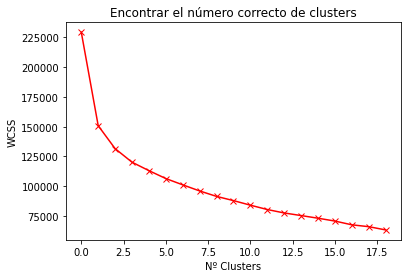

In [66]:
WCSS = []
for c in range(1,20):
  m_kmeans = KMeans(n_clusters = c) 
  m_kmeans.fit(pred) # 2 entrenamos el modelo con la data con reduccion de dimnsiones 
  WCSS.append(m_kmeans.inertia_) 

plt.plot(range(len(WCSS)), WCSS, "rx-")
plt.title('Encontrar el número correcto de clusters')
plt.xlabel('Nº Clusters')
plt.ylabel('WCSS') 
plt.show()

In [104]:
m_kmeans = KMeans(n_clusters = 3) 
m_kmeans.fit(sales_df_scaled)  # teniendo el valor de k=3 evaluamos la informacion escalada para sacar concluciones ahora con 3 grupos
samples_labels_2 = m_kmeans.labels_
cluster_values_2 = m_kmeans.cluster_centers_
print(samples_labels_2.shape)
print(cluster_values_2.shape)

(2823,)
(3, 37)


In [105]:
# obtenemos  el valor de las variables para cada cluster 
clusters_df_2 = pd.DataFrame(cluster_values_2, columns=sales_df.columns)

# realicemos una transformación inversa para interpretar 
clusters_df_array_2 = scaler.inverse_transform(clusters_df_2)
clusters_df_2 = pd.DataFrame(clusters_df_array_2, columns=sales_df.columns)
clusters_df_2.head() 

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Large,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,30.525741,69.047496,6.649766,2061.682800,7.118565,2003.812793,77.340094,62.788612,0.071763,0.017161,...,6.869505e-16,-1.110223e-15,1.000000e+00,0.265211,0.121685,0.131045,9.906396e-02,0.039002,0.092824,0.251170
1,47.222930,99.799554,5.369427,8293.753248,6.770701,2003.910828,158.184713,26.242038,0.044586,0.025478,...,1.000000e+00,-7.216450e-16,1.387779e-15,0.617834,0.121019,0.057325,-6.938894e-17,0.006369,0.044586,0.152866
2,37.947254,95.361741,6.420520,4398.433699,7.104769,2003.806358,115.848988,48.545520,0.062139,0.020954,...,7.424616e-16,1.000000e+00,-3.885781e-16,0.382948,0.112717,0.093208,7.731214e-02,0.018786,0.126445,0.188584


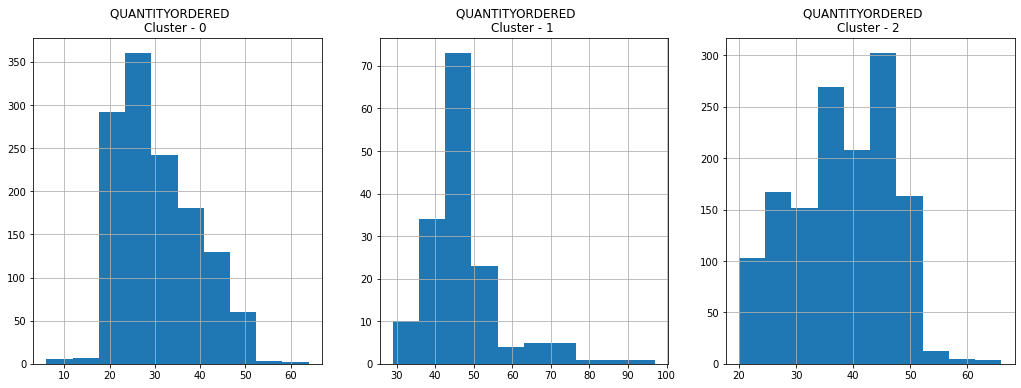

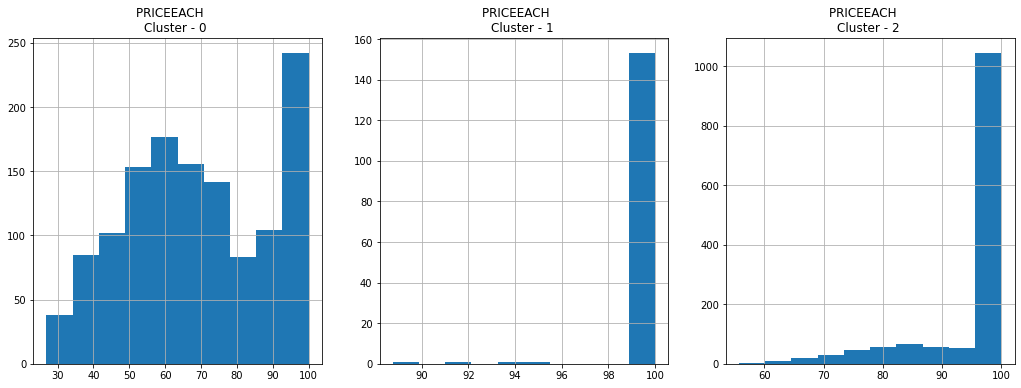

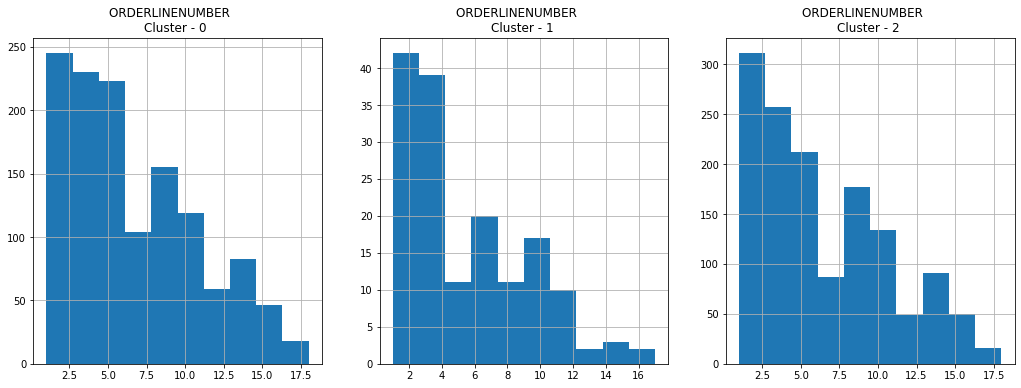

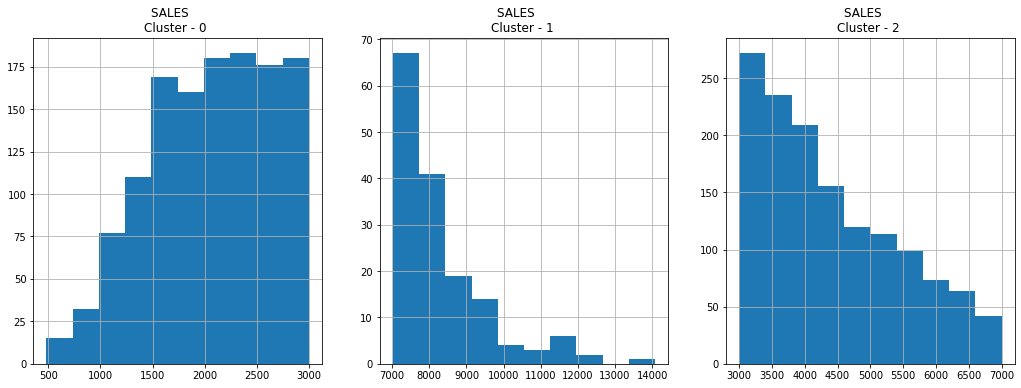

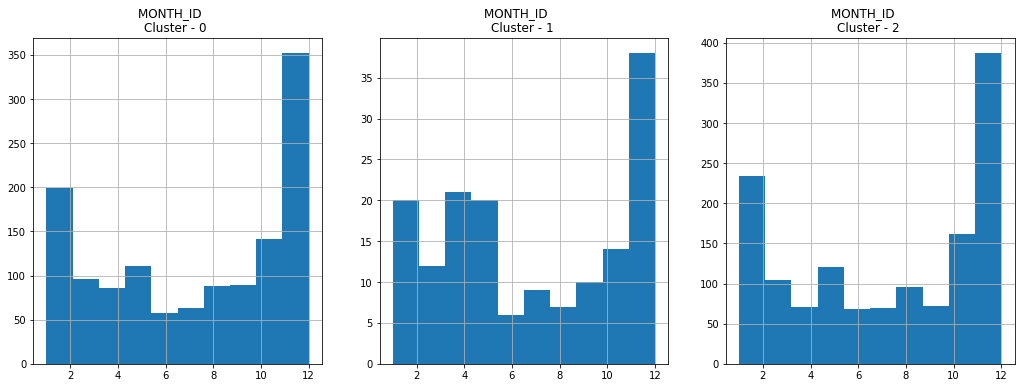

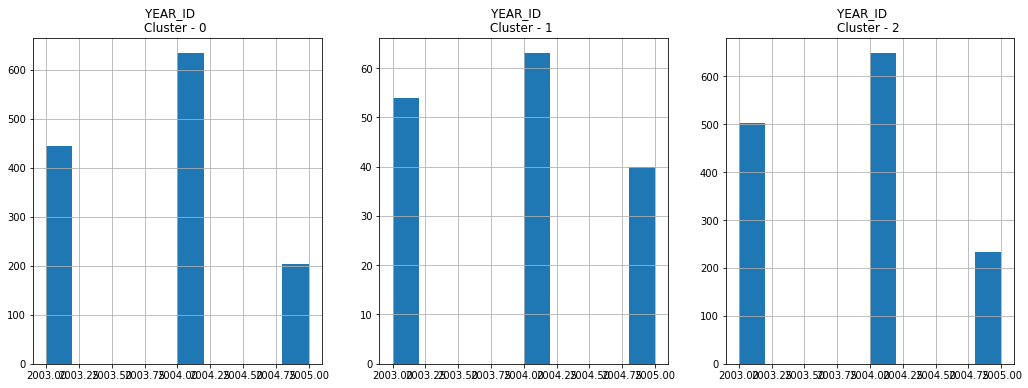

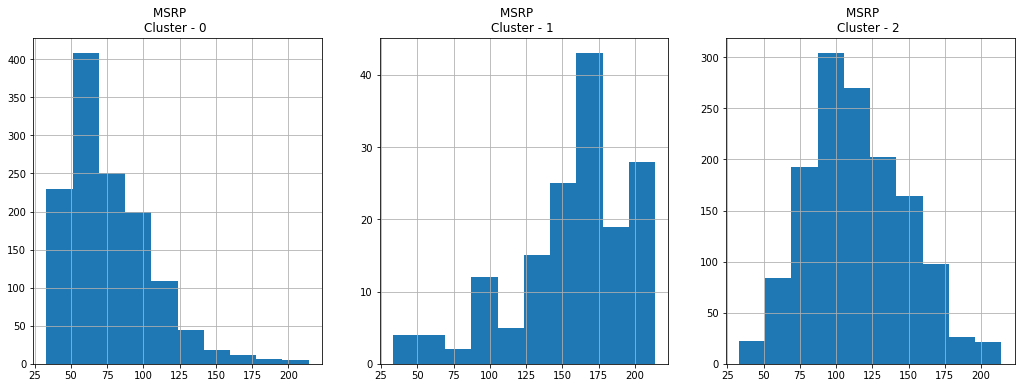

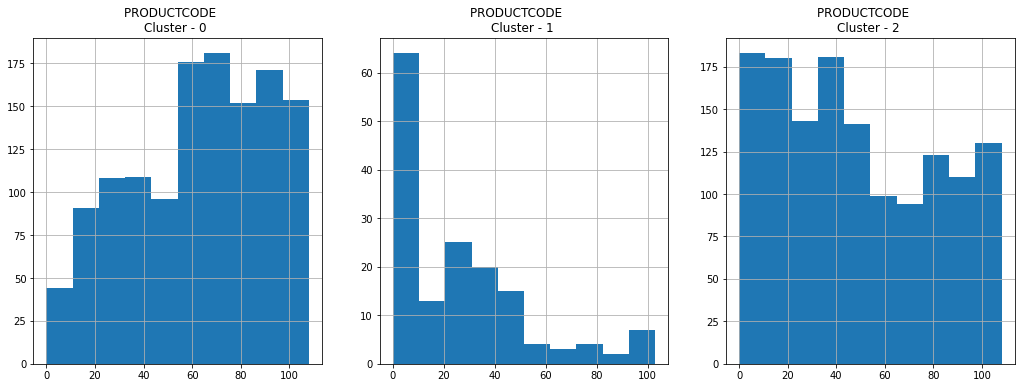

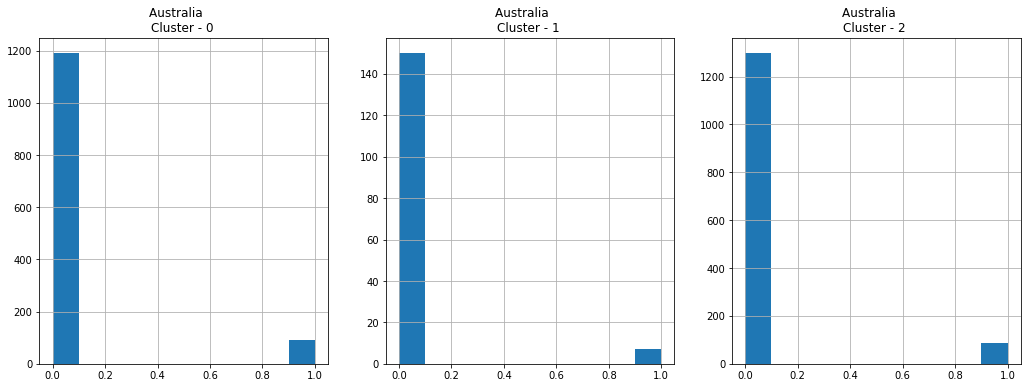

In [106]:
# creamos un dataframe para plotear histogramas
sales_df_c_2 = pd.concat([sales_df, pd.DataFrame({"CLUSTER": samples_labels_2})],axis=1)

# Representar un histograma para cada característica según el clúster al que pertenece
sale_df_cluster= sales_df_c_2
for i in sales_df.columns[:9]:
  plt.figure(figsize = (30, 6))
  for j in range(3):
    plt.subplot(1, 5, j+1)
    cluster = sale_df_cluster[sale_df_cluster['CLUSTER'] == j]
    cluster[i].hist()
    plt.title('{}    \nCluster - {} '.format(i,j))
  
  plt.show()

# conclusiones de los resultados del centro de los clusters (caracterisitcas de los grupos)
- Clúster 0: este grupo representa a los clientes que compran artículos en gran cantidad (47), por lo general compran artículos con precios altos (99). Aportan más ventas que otros grupos. En su mayoría están activos durante todo el año. Suelen comprar productos correspondientes al código de producto 10-90. Compran productos con un alto mrsp (158).

- Clúster 1: este grupo representa a los clientes que compran artículos en cantidad promedio (37) y que compran tienden a comprar artículos de precio alto (95). Aportan un promedio de ventas (4398) y están activos todo el año, son los mayores compradores de los productos correspondientes a los códigos de producto 0-10 y 90-100, además prefieren comprar productos con un PVPR elevado (115).

- Clúster 2: este grupo representa a los clientes que compran artículos en pequeñas cantidades (30), tienden a comprar artículos de bajo precio (69). Corresponden a la venta total más baja (2061) y están activos durante todo el año. Son los mayores compradores de productos correspondientes a los códigos de producto 0-

## hacemos reduccion de dimensiones PCA para plotear clusters 


In [107]:
# hacemos PCA para obtener un array con 3 variables para cada sample 
model_PCA = PCA(n_components=3)  
sales_PCA = model_PCA.fit_transform(sales_df_scaled) # shape (2389, 3)

# creamos un DF
sales_df_PCA_2 = pd.DataFrame(data= sales_PCA, columns= ["PCA1","PCA2", "PCA3"])
# lo unico que cambiaria seria la etiqueta de cluster para cada muestra 
sales_df_PCA_2 = pd.concat([sales_df_PCA_2, sales_df_c_2['CLUSTER']], axis=1) 
sales_df_PCA_2.head(2)

,PCA1,PCA2,PCA3,CLUSTER
0,-0.486336,-1.219858,1.044011,0
1,-0.784690,-1.092326,1.393851,0


In [109]:
fig = px.scatter_3d(data_frame= sales_df_PCA_2,
                    x = 'PCA1', y = 'PCA2', z = 'PCA3',
                    color = 'CLUSTER', symbol = 'CLUSTER',
                    size_max = 18, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0),
                  showlegend=False) 
fig.update_traces(marker_size = 5)

# concluciones 
- usando ML no supervisado (k-means) podemos clusterizar facilmente, lo importante es hacer una limpieza de datos buena para entrenar el modelo. 

- en base a los centros de cluster (el valor que toma cada variable en el centro de cada cluster, sacado de k-mean), podemos sacar concluciones de las necesidades de cada grupo de clientes. 

- podemos usar PCA para reducir las dimenciones de nuestro dataset y poder graficar los respectivos clusters. 
